In [22]:
import os
#os.environ["CUDA_VISIBLE_DEVICES"]="2"
import cv2
import numpy as np
import cupy as cp
import matplotlib.pyplot as plt
from cuml.cluster import KMeans
import shutil
import glob
from cucim.skimage.transform import warp
one_seg_only=True
one_seg_rem=False
seg_img=False
from cucim.skimage import registration
from skimage import io
img_list=[]
size='3328'
orient='Horizontal'
layers=['DAPI','CD3']
import tkinter
from tkinter import filedialog
from tifffile import imread
tkinter.Tk().withdraw()
#path1=os.path.join("D:\\","Users","Abu Bakr","Desktop","Raw images")
path1=filedialog.askdirectory(title='path for raw images')
img_list=[x for x in sorted(glob.glob(path1+"/*"))]

path2=filedialog.askdirectory(title='path for processed images')



In [23]:
from math import sqrt

COLORS = (0,0,0)


def closest_color(centers):
    print(centers)
    closest_color_ctrs=[]
    i=0
    for rgb in centers:
        r, g, b = rgb
        color_diffs_pctr = []
        #for color in COLORS:
        cr, cg, cb = COLORS
            #compensate for float
        color_diff = sqrt(abs(r - cr)**2 + abs(g - cg)**2 + abs(b - cb)**2)
        closest_color_ctrs.append((color_diff,i))
        #closest_color_ctrs.append((min(color_diffs_pctr),i))
        i=i+1
    print(min(closest_color_ctrs))
    if(min(closest_color_ctrs)[0]<300):
        return min(closest_color_ctrs)[1]
    else:
        return -1

In [53]:
img_store=0
for img_no in img_list:
    print(img_no)
    if(os.path.exists(os.path.join(path2,f"{img_store:06d}"))==False):
        os.makedirs(os.path.join(path2,f"{img_store:06d}"),exist_ok=False)
    #img=cv2.imread(img_no)
    #img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img=imread(img_no)
    pixel_values = img.reshape((-1, 3))
    pixel_values = cp.float32(pixel_values)
    
    
    
    k=4
    #print("input:")
    #print(b)

    print("Calling fit")
    kmeans_float = KMeans(n_clusters=k,max_iter=30,tol=0.0001)
    kmeans_float.fit(pixel_values)

    labels=kmeans_float.labels_
    centers=kmeans_float.cluster_centers_
    
    
    
    #centers = np.uint8(centers)
    blue_idx=closest_color(centers)
    
    
    # flatten the labels array --->Check
    labels = labels.flatten()

    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape(img.shape)
    cv2.imwrite(os.path.join(path2,f"{img_store:06d}","segmented_image "+f"{img_store:06d}"+".png"),segmented_image)
    if(one_seg_only==True):
        for i in range (k):
            if(seg_img==True):
                temp = cp.copy(segmented_image) # segmented_image flattens the image, ie processes the image and brings down the number of 
                                    # colors to k colors and changes each cluster's color to the centroid
            else:
                temp=cp.copy(img) #for real image
        # convert to the shape of a vector of pixel values
            temp = temp.reshape((-1, 3))
        # color (i.e cluster) to disable
            cluster = i
            #temp[labels == cluster] = [0, 0, 0] #for removing color belonging to a cluster

            temp[labels != cluster] = [0, 0, 0] # for removing any color not belonging to cluster


    # convert back to original shape
            temp = temp.reshape(img.shape)
            t2=cv2.cvtColor(temp,cv2.COLOR_RGB2BGR)
               # t2=cv2.medianBlur(t2,25)
            if(i==blue_idx):
                print(i)
                cv2.imwrite(os.path.join(path2,f"{img_store:06d}","cd3"+".png"),t2)
            
            else:
                cv2.imwrite(os.path.join(path2,f"{img_store:06d}","seg_one_only "+f"{i:03d}"+".png"),t2)
            if(blue_idx==-1):
                cv2.imwrite(os.path.join(path2,f"{img_store:06d}","cd3"+".png"),np.zeros_like(t2))
    if(one_seg_rem==True):
        for i in range (k):
            if(seg_img==True):
                temp = cp.copy(segmented_image) # segmented_image flattens the image, ie processes the image and brings down the number of 
                                    # colors to k colors and changes each cluster's color to the centroid
            else:
                temp=cp.copy(img) #for real image
        # convert to the shape of a vector of pixel values
            temp = temp.reshape((-1, 3))
        # color (i.e cluster) to disable
            cluster = i
            temp[labels == cluster] = [0, 0, 0] #for removing color belonging to a cluster

            #temp[labels != cluster] = [0, 0, 0] # for removing any color not belonging to cluster


    # convert back to original shape
            temp = temp.reshape(img.shape)
            t2=cv2.cvtColor(temp,cv2.COLOR_RGB2BGR)
               # t2=cv2.medianBlur(t2,25)
            cv2.imwrite(os.path.join(path2,f"{img_store:06d}","seg_one_rem "+f"{i:03d}"+".png"),t2)
    #cv2.imwrite(os.path.join(path2,f"{img_store:06d}","he"+".png"),img)
    img_store=img_store+1

/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/Raw_Data/Lung_IHC_TIFF/Lung_IHC_TIFF_s01.tif
Calling fit
[[718.19025 714.67017 713.9596 ]
 [718.19025 714.6702  713.95966]
 [718.1903  714.6701  713.9596 ]
 [718.1902  714.6701  713.95966]]
(1239.471214520144, 3)
/media/saab/f7ee81f1-4052-4c44-b470-0a4a650ee479/Raw_Data/Lung_IHC_TIFF/Lung_IHC_TIFF_s02.tif
Calling fit


KeyboardInterrupt: 

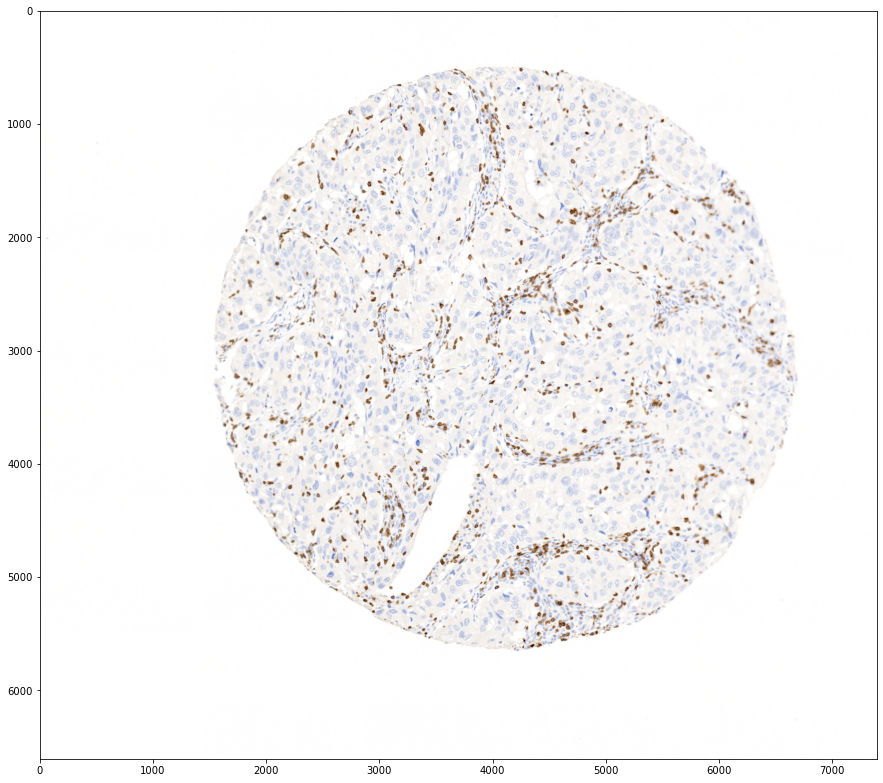

In [55]:
plt.figure(figsize=(15,15))
plt.imshow(img[:,:,:])

In [25]:
for x in pixel_values:
    print(x)

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 253.]
[255. 255. 254.]
[254. 254. 254.]
[254. 254. 254.]
[254. 252. 251.]
[255. 252. 249.]
[255. 252. 249.]
[255. 252. 250.]
[255. 254. 252.]
[255. 254. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 254.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[254. 255. 255.]
[254. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[254. 255. 255.]
[254. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 254. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 253.]
[254. 255. 255.]
[254. 255. 255.]
[255. 255. 253.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 251.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 251.]
[255. 255. 252.]
[254. 255. 255.]
[252. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 253.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[254. 255. 255.]
[254. 255. 255.]
[255. 255. 254.]
[255. 255. 252.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 255.]
[254. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[254. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 254. 255.]
[255. 254. 255.]
[255. 254. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 253.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 253.]
[254. 255. 255.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 253.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[254. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 251.]
[254. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 254.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 253.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[254. 255. 255.]
[253. 255. 255.]
[253. 255. 255.]
[254. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 252.]
[255. 255. 254.]
[255. 255. 252.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 255

[255. 255. 254.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[254. 255. 255.]
[254. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[254. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 254. 254.]
[255. 254. 254.]
[255. 254. 255.]
[255. 254. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 252.]
[254. 255. 255.]
[254. 255. 255.]
[255. 255. 252.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[254. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 252.]
[255. 255. 252.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 254. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[254. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[254. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 253.]
[255. 255. 253.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[254. 255. 255.]
[254. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[254. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[254. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 254. 255.]
[255. 254. 255.]
[255. 255. 255.]
[255. 255. 253.]
[255. 255. 254.]
[254. 255. 255.]
[254. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 254.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255.]
[255. 255. 255

KeyboardInterrupt: 

In [44]:
img[:,:,1].shape

(6600, 7381)

In [54]:
np.unique(img)

array([  0,  11,  18,  24,  30,  34,  39,  42,  46,  49,  53,  56,  59,
        61,  64,  67,  69,  72,  74,  76,  78,  80,  83,  85,  87,  89,
        90,  92,  94,  96,  98,  99, 101, 103, 105, 106, 108, 109, 111,
       112, 114, 115, 117, 118, 120, 121, 123, 124, 125, 127, 128, 129,
       131, 132, 133, 134, 136, 137, 138, 139, 141, 142, 143, 144, 145,
       146, 148, 149, 150, 151, 152, 153, 154, 155, 156, 158, 159, 160,
       161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173,
       174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186,
       187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199,
       200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212,
       213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225,
       226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238,
       239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251,
       252, 253, 254, 255], dtype=uint8)